In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Task 1: Harris Corner Detection

In [ ]:
def harris_corner_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if image was successfully loaded
    if image is None:
        print("Error: Could not open or find the image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the gray image to float32 type
    gray = np.float32(gray)

    # Apply the Harris Corner Detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Result is dilated for marking the corners, not necessary but can make them more visible
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, marking the detected corners on the original image
    image[dst > 0.01 * dst.max()] = [0, 0, 255]  # Marking the corners in red

    # Convert the image from BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected corners
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

# Task 2: HOG Feature Extraction

In [ ]:
def hog_feature_extraction(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if image was successfully loaded
    if image is None:
        print("Error: Could not open or find the image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the gray image to float32 type
    gray = np.float32(gray)

    # Apply HOG descriptor
    hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

    # Normalize the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display the original image and the HOG image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    # Original image
    ax1.axis('off')
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')

    # HOG image (shows gradient orientations)
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap='gray')
    ax2.set_title('HOG Features')
    plt.show()

# Task 3: ORB Feature Extraction and Matching

In [ ]:
def orb_feature_matching(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if image was successfully loaded
    if image1 and image2 is None:
        print("Error: Could not open or find the image.")
        return

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Create an ORB detector object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Define FLANN parameters
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm=FLANN_INDEX_LSH,
                        table_number=6,  # 12
                        key_size=12,      # size of the hashed key
                        multi_probe_level=1)  # or 2
    search_params = dict(checks=50)  # or pass empty for default

    # Create a FLANN matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors between the two images
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Store good matches
    good_matches = []
    for match in matches:
        if len(match) == 2:  # Ensure there are two matches
            m, n = match
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)

    # Draw matches
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matched features
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    plt.title('Feature Matching using ORB and FLANN')
    plt.axis('off')
    plt.show()

# Task 4: SIFT and SURF Feature Extraction

In [ ]:
!pip uninstall opencv-python opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

In [ ]:
!apt-get update
!apt-get install -y build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev libpng-dev libtiff-dev libdc1394-22-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,105 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,433 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

import os
os.makedirs('opencv/build', exist_ok=True)
os.chdir('opencv/build')

!cmake -D CMAKE_BUILD_TYPE=Release \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D OPENCV_ENABLE_NONFREE=ON \
       ..

!make -j$(nproc)
!make install

Cloning into 'opencv'...
remote: Enumerating objects: 337687, done.
remote: Counting objects: 100% (907/907), done.
remote: Compressing objects: 100% (714/714), done.
remote: Total 337687 (delta 375), reused 478 (delta 155), pack-reused 336780 (from 1)
Receiving objects: 100% (337687/337687), 528.21 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (235498/235498), done.
Updating files: 100% (7566/7566), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41779, done.
remote: Counting objects: 100% (1529/1529), done.
remote: Compressing objects: 100% (1106/1106), done.
remote: Total 41779 (delta 583), reused 1019 (delta 334), pack-reused 40250 (from 1)
Receiving objects: 100% (41779/41779), 150.33 MiB | 26.54 MiB/s, done.
Resolving deltas: 100% (25694/25694), done.
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /u

In [ ]:
!pip install --upgrade pip setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 45.6 MB/s eta 0:00:00


In [ ]:
import cv2.xfeatures2d

def sift_and_surf_feature_extraction(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if image was successfully loaded
    if image1 is None or image2 is None:
        print("Error: Could not open or find the image.")
        return

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # SIFT
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    sift_result = cv2.drawKeypoints(image1, keypoints1, None)

    # SURF
    surf = cv2.xfeatures2d.SURF_create()
    keypoints2, descriptors2 = surf.detectAndCompute(gray2, None)
    surf_result = cv2.drawKeypoints(image2, keypoints2, None)

    # Display Output
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(sift_result, cv2.COLOR_BGR2RGB))
    plt.title("SIFT Keypoints")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(surf_result, cv2.COLOR_BGR2RGB))
    plt.title("SURF Keypoints")
    plt.show()

# Task 5: Feature Matching using Brute-Force Matcher

In [ ]:
def brute_force_feature_matching(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if image was successfully loaded
    if image1 and image2 is None:
        print("Error: Could not open or find the image.")
        return

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create()

    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)

    matches2 = bf.match(descriptors1, descriptors2)

    matches2 = sorted(matches2, key = lambda x: x.distance)

    orb_bf_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches2[0:10],
                                     None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(orb_bf_matches, cv2.COLOR_BGR2RGB))
    plt.title("BF Feature Matching with ORB")
    plt.axis("off")
    plt.show()

# Task 6: Image Segmentation using Watershed Algorithm

In [ ]:
def watershed_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if image was successfully loaded
    if image is None:
        print("Error: Could not open or find the image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to get a binary image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Perform morphological operations to clean up the binary image
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    unknown = cv2.subtract(sure_bg, np.uint8(sure_fg))

    # Marker labeling
    _, markers = cv2.connectedComponents(np.uint8(sure_fg))

    # Add one to all the labels so that sure regions are marked with different values
    markers = markers + 1

    # Mark the unknown region with zero
    markers[unknown == 255] = 0

    # Apply the Watershed algorithm
    cv2.watershed(image, markers)

    # Mark the boundaries with red color
    image[markers == -1] = [255, 0, 0]  # Red color for boundaries

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(binary, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')
    plt.show()

Task 1 Output

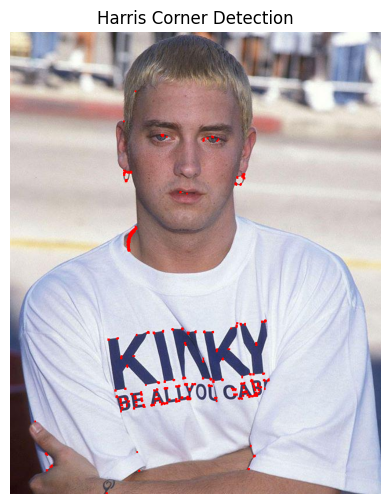

In [ ]:
harris_corner_detection('slimshady.jpg')

Task 2 Output

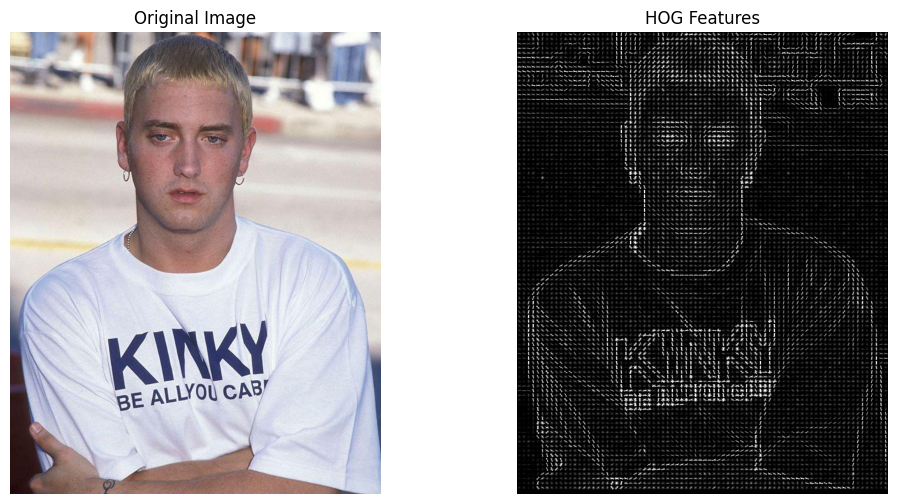

In [ ]:
hog_feature_extraction('slimshady.jpg')

Task 3 Output

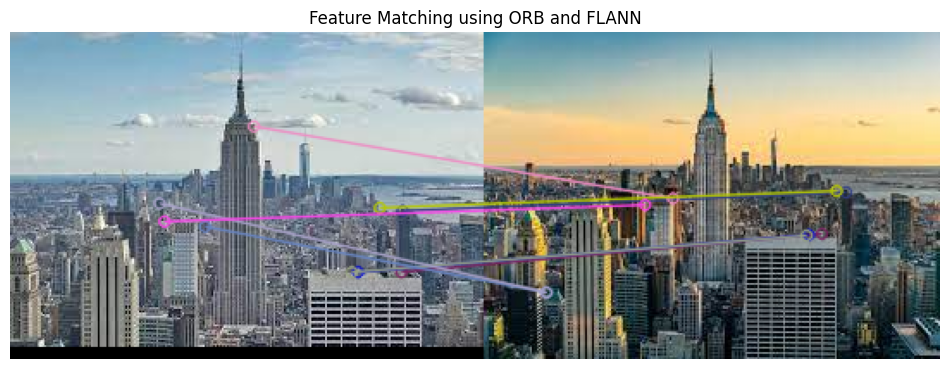

In [ ]:
orb_feature_matching('building.jpg', 'building1.jpg')

Task 4 Output

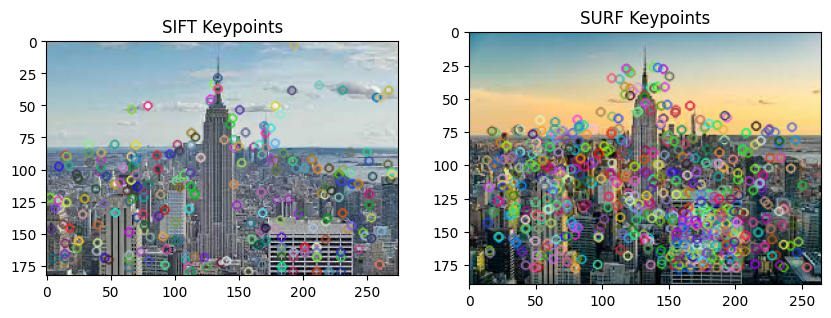

In [ ]:
sift_and_surf_feature_extraction('building.jpg', 'building1.jpg')

Task 5 Output

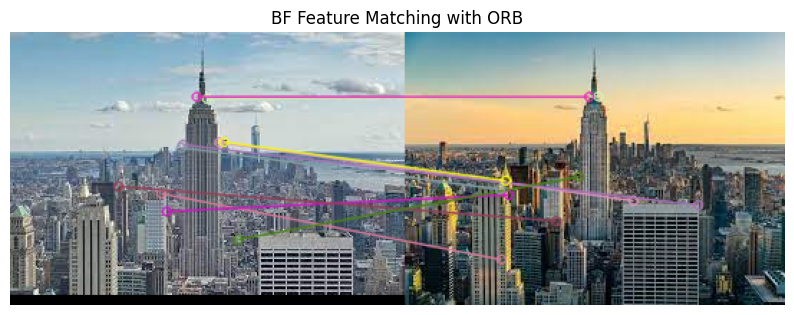

In [ ]:
brute_force_feature_matching('building.jpg', 'building1.jpg')

Task 6 Output

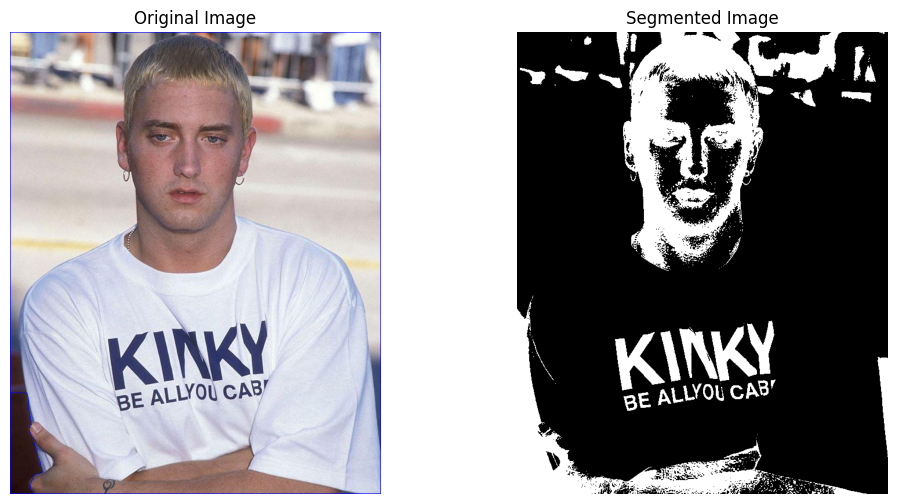

In [ ]:
watershed_segmentation('slimshady.jpg')